In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
# Load the csv file into a pandas dataframe
rb_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data-Collection/rb/rb_college_summary.csv')

In [ ]:
# Create a new column 'Target' with default value of 0
rb_df['Target'] = 0

# Set the value of 'Target' to 1 where 'Top_24_Seasons' has value 1 or greater
rb_df.loc[rb_df['Top_24_Seasons'] >= 1, 'Target'] = 1

y_rb = rb_df['Target']
rb_df = rb_df.drop(['Top_24_Seasons', 'Target', 'Player'], axis=1)

In [ ]:
print(len(rb_df))

330


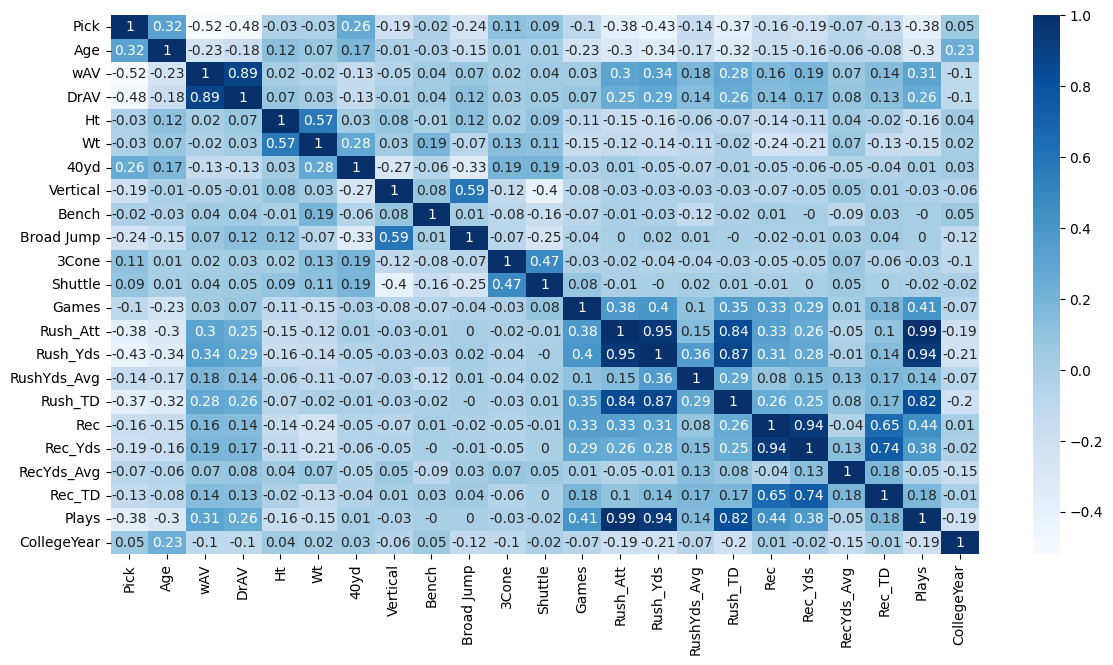

In [ ]:
# Calculate and visualize correlation matrix
corr_matrix = rb_df.corr().round(2)
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Blues)
# YlOrBr


plt.show()

In [ ]:
# Split the data to test and training with 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(rb_df, y_rb, random_state=42)

# Normalize the dataset to zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Recall: 0.800
Precision: 0.833
Accuracy: 0.892
Confusion matrix, without normalization


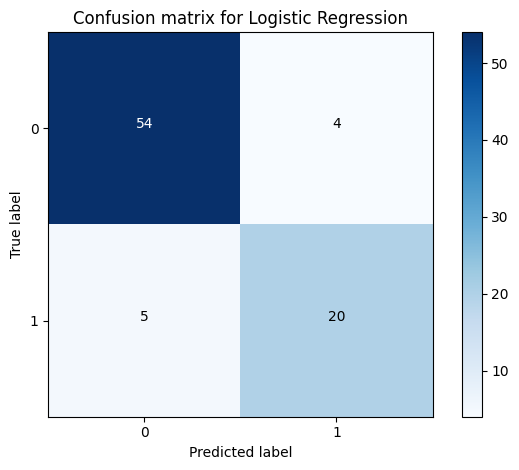

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Instantiate a Logistic Regression model. The first attempts did not converge even with scaled data. 
log_reg = LogisticRegression(max_iter=5000, random_state=42) # Increase max iterations by a factor of 10.

# Fit the model on the training set
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate and print confusion matrix and other test scores
confusion_lr = confusion_matrix(y_test, y_pred)
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

plot_confusion_matrix(confusion_lr, classes=['0','1'])
plt.title('Confusion matrix for Logistic Regression')
plt.show()




In [ ]:
# Extract the feature importances
importances = log_reg.coef_[0]

# Create a list of the feature names and their importances
feature_names = list(X_train.columns)
features_importances = list(zip(feature_names, importances))

# Sort the features by importance (in descending order)
sorted_features_importances = sorted(features_importances, key=lambda x: x[1], reverse=True)

# Print the list of the most important features
print("List of the most important features:")
for feature, importance in sorted_features_importances:
    print(f"{feature}: {importance:.3f}")

List of the most important features:
wAV: 2.443
DrAV: 0.868
Rush_TD: 0.608
Broad Jump: 0.386
Rec_Yds: 0.374
Shuttle: 0.226
Wt: 0.151
RushYds_Avg: 0.098
Rec: 0.083
Age: 0.078
RecYds_Avg: 0.046
Games: 0.034
Bench: -0.024
Rush_Att: -0.045
Plays: -0.068
Ht: -0.137
Rush_Yds: -0.168
40yd: -0.179
Vertical: -0.227
Pick: -0.242
CollegeYear: -0.321
3Cone: -0.323
Rec_TD: -0.431


Recall: 0.800
Precision: 0.769
Accuracy: 0.867
Confusion matrix, without normalization


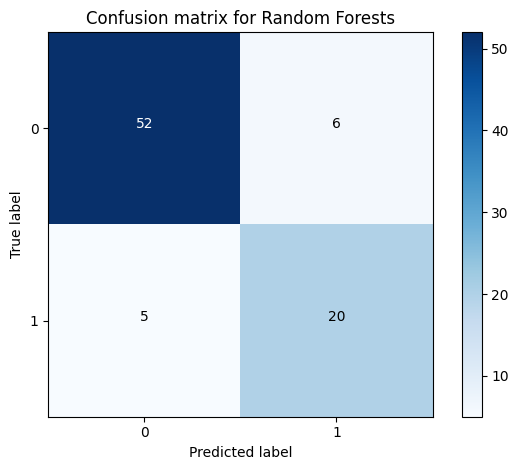

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42).fit(X_train_scaled, y_train)

# sum(y_test)
# clf.score(X_test, y_test)

y_predicted = clf.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_predicted)
#confusion
#sum(y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
confusion_rf = confusion_matrix(y_test, y_predicted)
plot_confusion_matrix(confusion_rf, classes=['0','1'])
plt.title('Confusion matrix for Random Forests')
plt.show()


In [ ]:
# Extract feature importances from the trained random forest model
importances = clf.feature_importances_

# Create a list of feature names and importances
feature_importances = list(zip(X_test.columns, importances))

# Sort the feature importances in descending order
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print the list of most important features
print("List of most important features:")
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

List of most important features:
wAV: 0.28561916385077063
DrAV: 0.18214969974717649
Pick: 0.08176705517922656
Rush_TD: 0.0430603206714302
Rush_Yds: 0.035433381202563285
Plays: 0.028532012738825115
Rush_Att: 0.027511718209273527
RecYds_Avg: 0.026567058067835363
Rec_Yds: 0.02604649650122248
3Cone: 0.024224284296996065
40yd: 0.024062952605815244
Rec: 0.022145021523654086
Shuttle: 0.021989680801561325
RushYds_Avg: 0.020471039224330644
Wt: 0.019894718442678865
Broad Jump: 0.01852757975990777
Age: 0.017735964291413074
Vertical: 0.01764715025723927
Bench: 0.017633172825173984
Ht: 0.0174555131558807
Games: 0.0171970716560589
Rec_TD: 0.01431356254253772
CollegeYear: 0.010015382448428842


Recall: 0.640
Precision: 0.800
Accuracy: 0.843
Confusion matrix, without normalization


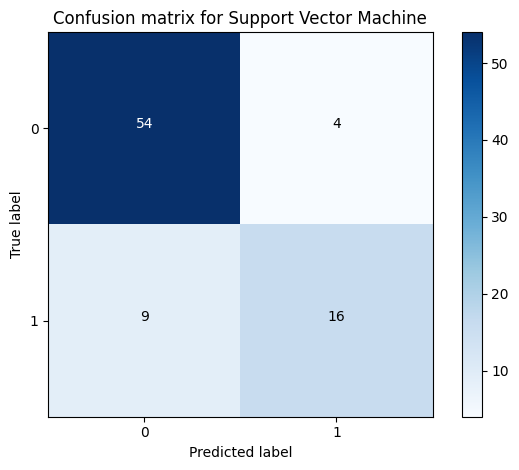

In [ ]:
from sklearn.svm import SVC

# Instantiate an SVM model with default hyperparameters
svm = SVC(random_state=42)

# Fit the model on the training set
svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)

# Calculate and print confusion matrix and other test scores
confusion_svm = confusion_matrix(y_test, y_pred)
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
plot_confusion_matrix(confusion_svm, classes=['0','1'])
plt.title('Confusion matrix for Support Vector Machine')
plt.show()

Recall: 0.800
Precision: 0.714
Accuracy: 0.843
Confusion matrix, without normalization


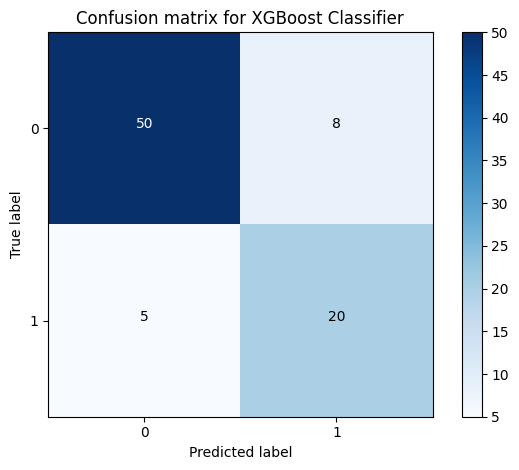

In [ ]:
import xgboost as xgb

# Create an XGBoost classifier
clf = xgb.XGBClassifier(random_state=42)

# Fit the classifier on the training set
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate and print confusion matrix and other test scores
confusion_xgb = confusion_matrix(y_test, y_pred)
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))


# Plot confusion matrix
plot_confusion_matrix(confusion_xgb, classes=['0','1'])
plt.title('Confusion matrix for XGBoost Classifier')
plt.show()